# Pyfolio Integration

Alphalens can simulate the performance of a portfolio where the factor values are use to weight stocks. Once the portfolio is built, it can be analyzed by Pyfolio. For details on how this portfolio is built see:
- alphalens.performance.factor_returns
- alphalens.performance.cumulative_returns 
- alphalens.performance.create_pyfolio_input

## Imports & Settings

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import alphalens
import pyfolio
import pandas as pd

In [3]:
%matplotlib inline

## Load Data

First load some stocks data

In [5]:
tickers = [ 'ACN', 'ATVI', 'ADBE', 'AMD', 'AKAM', 'ADS', 'GOOGL', 'GOOG', 'APH', 'ADI', 'ANSS', 'AAPL',
'AVGO', 'CA', 'CDNS', 'CSCO', 'CTXS', 'CTSH', 'GLW', 'CSRA', 'DXC', 'EBAY', 'EA', 'FFIV', 'FB',
'FLIR', 'IT', 'GPN', 'HRS', 'HPE', 'HPQ', 'INTC', 'IBM', 'INTU', 'JNPR', 'KLAC', 'LRCX', 'MA', 'MCHP',
'MSFT', 'MSI', 'NTAP', 'NFLX', 'NVDA', 'ORCL', 'PAYX', 'PYPL', 'QRVO', 'QCOM', 'RHT', 'CRM', 'STX',
'AMG', 'AFL', 'ALL', 'AXP', 'AIG', 'AMP', 'AON', 'AJG', 'AIZ', 'BAC', 'BK', 'BBT', 'BRK.B', 'BLK', 'HRB',
'BHF', 'COF', 'CBOE', 'SCHW', 'CB', 'CINF', 'C', 'CFG', 'CME', 'CMA', 'DFS', 'ETFC', 'RE', 'FITB', 'BEN',
'GS', 'HIG', 'HBAN', 'ICE', 'IVZ', 'JPM', 'KEY', 'LUK', 'LNC', 'L', 'MTB', 'MMC', 'MET', 'MCO', 'MS',
'NDAQ', 'NAVI', 'NTRS', 'PBCT', 'PNC', 'PFG', 'PGR', 'PRU', 'RJF', 'RF', 'SPGI', 'STT', 'STI', 'SYF', 'TROW',
'ABT', 'ABBV', 'AET', 'A', 'ALXN', 'ALGN', 'AGN', 'ABC', 'AMGN', 'ANTM', 'BCR', 'BAX', 'BDX', 'BIIB', 'BSX',
'BMY', 'CAH', 'CELG', 'CNC', 'CERN', 'CI', 'COO', 'DHR', 'DVA', 'XRAY', 'EW', 'EVHC', 'ESRX', 'GILD', 'HCA',
'HSIC', 'HOLX', 'HUM', 'IDXX', 'ILMN', 'INCY', 'ISRG', 'IQV', 'JNJ', 'LH', 'LLY', 'MCK', 'MDT', 'MRK', 'MTD',
'MYL', 'PDCO', 'PKI', 'PRGO', 'PFE', 'DGX', 'REGN', 'RMD', 'SYK', 'TMO', 'UNH', 'UHS', 'VAR', 'VRTX', 'WAT',
'MMM', 'AYI', 'ALK', 'ALLE', 'AAL', 'AME', 'AOS', 'ARNC', 'BA', 'CHRW', 'CAT', 'CTAS', 'CSX', 'CMI', 'DE',
'DAL', 'DOV', 'ETN', 'EMR', 'EFX', 'EXPD', 'FAST', 'FDX', 'FLS', 'FLR', 'FTV', 'FBHS', 'GD', 'GE', 'GWW',
'HON', 'INFO', 'ITW', 'IR', 'JEC', 'JBHT', 'JCI', 'KSU', 'LLL', 'LMT', 'MAS', 'NLSN', 'NSC', 'NOC', 'PCAR',
'PH', 'PNR', 'PWR', 'RTN', 'RSG', 'RHI', 'ROK', 'COL', 'ROP', 'LUV', 'SRCL', 'TXT', 'TDG', 'UNP', 'UAL',
'AES', 'LNT', 'AEE', 'AEP', 'AWK', 'CNP', 'CMS', 'ED', 'D', 'DTE', 'DUK', 'EIX', 'ETR', 'ES', 'EXC']

### YFinance Download

In [6]:
import yfinance as yf
import pandas_datareader.data as web
yf.pdr_override()

df = web.get_data_yahoo(tickers, start='2015-01-01',  end='2017-01-01')
df.index = pd.to_datetime(df.index, utc=True)

[*********************100%***********************]  247 of 247 completed

19 Failed downloads:
- BRK.B: No data found, symbol may be delisted
- ARNC: Data doesn't exist for startDate = 1420092000, endDate = 1483250400
- RHT: No data found, symbol may be delisted
- CELG: No data found, symbol may be delisted
- JEC: No data found, symbol may be delisted
- BHF: Data doesn't exist for startDate = 1420092000, endDate = 1483250400
- FLIR: No data found, symbol may be delisted
- HRS: No data found, symbol may be delisted
- BBT: No data found, symbol may be delisted
- IR: Data doesn't exist for startDate = 1420092000, endDate = 1483250400
- RTN: No data found, symbol may be delisted
- BCR: No data found for this date range, symbol may be delisted
- STI: No data found, symbol may be delisted
- ETFC: No data found, symbol may be delisted
- LLL: No data found, symbol may be delisted
- AGN: No data found, symbol may be delisted
- MYL: No data found, symbol may be delisted
- VAR: No data found, sym

### Data Formatting

In [7]:
df = df.stack()
df.index.names = ['date', 'asset']
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 113905 entries, (Timestamp('2015-01-02 00:00:00+0000', tz='UTC'), 'A') to (Timestamp('2016-12-30 00:00:00+0000', tz='UTC'), 'XRAY')
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Adj Close  113905 non-null  float64
 1   Close      113905 non-null  float64
 2   High       113905 non-null  float64
 3   Low        113905 non-null  float64
 4   Open       113905 non-null  float64
 5   Volume     113905 non-null  float64
dtypes: float64(6)
memory usage: 5.7+ MB


## Compute Factor

We'll compute a simple mean reversion factor looking at recent stocks performance: stocks that performed well in the last 5 days will have high rank and vice versa.

In [8]:
factor = df.loc[:,'Open'].unstack('asset')
factor = -factor.pct_change(5)
factor = factor.stack()

The pricing data passed to alphalens should contain the entry price for the assets so it must reflect the next available price after a factor value was observed at a given timestamp. Those prices must not be used in the calculation of the factor values for that time. Always double check to ensure you are not introducing lookahead bias to your study.

The pricing data must also contain the exit price for the assets, for period 1 the price at the next timestamp will be used, for period 2 the price after 2 timestats will be used and so on.

There are no restrinctions/assumptions on the time frequencies a factor should be computed at and neither on the specific time a factor should be traded (trading at the open vs trading at the close vs intraday trading), it is only required that factor and price DataFrames are properly aligned given the rules above.

In our example, before the trading starts every day, we observe yesterday factor values. The price we pass to alphalens is the next available price after that factor observation: the daily open price that will be used as assets entry price. Also, we are not adding additional prices so the assets exit price will be the following days open prices (how many days depends on 'periods' argument). The retuns computed by Alphalens will therefore based on assets open prices.

In [9]:
pricing = df.loc[:,'Open'].unstack('asset').iloc[1:]

## Run Alphalens Analysis

### Get Input Data

In [10]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor,
                                                                   pricing,
                                                                   periods=(1, 3, 5),
                                                                   quantiles=5,
                                                                   bins=None)

Dropped 1.0% entries from factor data: 1.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


### Summary Tear Sheet

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.750000,0.074078,-0.041860,0.036252,22524,20.163283
2,-0.113307,0.094112,-0.013878,0.020650,22233,19.902782
3,-0.076330,0.109895,-0.001774,0.019613,22219,19.890250
4,-0.046965,0.127395,0.010247,0.020084,22228,19.898306
5,-0.029071,0.428571,0.037064,0.033591,22504,20.145379


Returns Analysis


,1D,3D,5D
Ann. alpha,0.274,0.127,0.092
beta,0.093,0.032,0.050
Mean Period Wise Return Top Quantile (bps),5.338,2.504,1.897
Mean Period Wise Return Bottom Quantile (bps),-3.150,-1.657,-1.693
Mean Period Wise Spread (bps),8.488,4.156,3.585


Information Analysis


,1D,3D,5D
IC Mean,0.016,0.012,0.016
IC Std.,0.173,0.170,0.170
Risk-Adjusted IC,0.091,0.069,0.095
t-stat(IC),2.033,1.531,2.109
p-value(IC),0.043,0.126,0.035
IC Skew,0.085,0.158,0.088
IC Kurtosis,0.354,0.353,0.407


Turnover Analysis


,1D,3D,5D
Quantile 1 Mean Turnover,0.347,0.601,0.788
Quantile 2 Mean Turnover,0.606,0.745,0.801
Quantile 3 Mean Turnover,0.650,0.761,0.784
Quantile 4 Mean Turnover,0.606,0.744,0.796
Quantile 5 Mean Turnover,0.350,0.596,0.781


,1D,3D,5D
Mean Factor Rank Autocorrelation,0.749,0.359,-0.015


<Figure size 432x288 with 0 Axes>

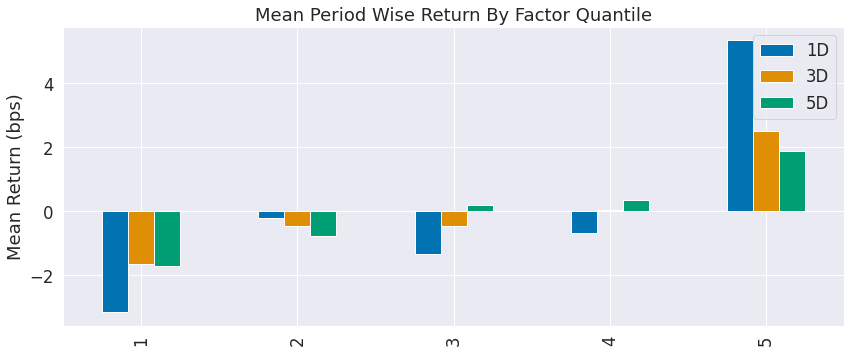

In [11]:
alphalens.tears.create_summary_tear_sheet(factor_data);

## Run Pyfolio Analysis

### Get Input Data

We can see in Alphalens analysis that quantiles 1 and 5 are the most predictive so we'll build a portfolio data using only those quantiles.

In [12]:
pf_returns, pf_positions, pf_benchmark = \
    alphalens.performance.create_pyfolio_input(factor_data,
                                               period='1D',
                                               capital=100000,
                                               long_short=True,
                                               group_neutral=False,
                                               equal_weight=True,
                                               quantiles=[1,5],
                                               groups=None,
                                               benchmark_period='1D')

### Pyfolio Tearsheet

Now that we have prepared the data we can run Pyfolio functions

Start date,2015-01-09
End date,2016-12-22
Total months,34
,Backtest
Annual return,7.828%
Cumulative returns,23.804%
Annual volatility,4.988%
Sharpe ratio,1.54
Calmar ratio,1.83
Stability,0.86
Max drawdown,-4.283%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,4.28,2016-03-28,2016-06-16,NaT,NaN
1,2.32,2016-01-04,2016-02-08,2016-02-11,29
2,2.31,2015-09-17,2015-09-28,2015-10-23,27
3,2.03,2015-02-04,2015-02-13,2015-04-01,41
4,1.36,2015-07-06,2015-07-17,2015-07-30,19


Stress Events,mean,min,max
Fall2015,0.05%,-1.00%,3.55%
New Normal,0.03%,-1.27%,3.55%


Top 10 long positions of all time,max
asset,
A,1.11%
AAL,1.11%
AAPL,1.11%
ABBV,1.11%
ABC,1.11%
ABT,1.11%
ADBE,1.11%
ADI,1.11%
ADS,1.11%


Top 10 short positions of all time,max
asset,
A,-1.11%
AAL,-1.11%
AAPL,-1.11%
ABBV,-1.11%
ABC,-1.11%
ABT,-1.11%
ACN,-1.11%
ADBE,-1.11%
ADI,-1.11%


Top 10 positions of all time,max
asset,
A,1.11%
AAL,1.11%
AAPL,1.11%
ABBV,1.11%
ABC,1.11%
ABT,1.11%
ACN,1.11%
ADBE,1.11%
ADI,1.11%


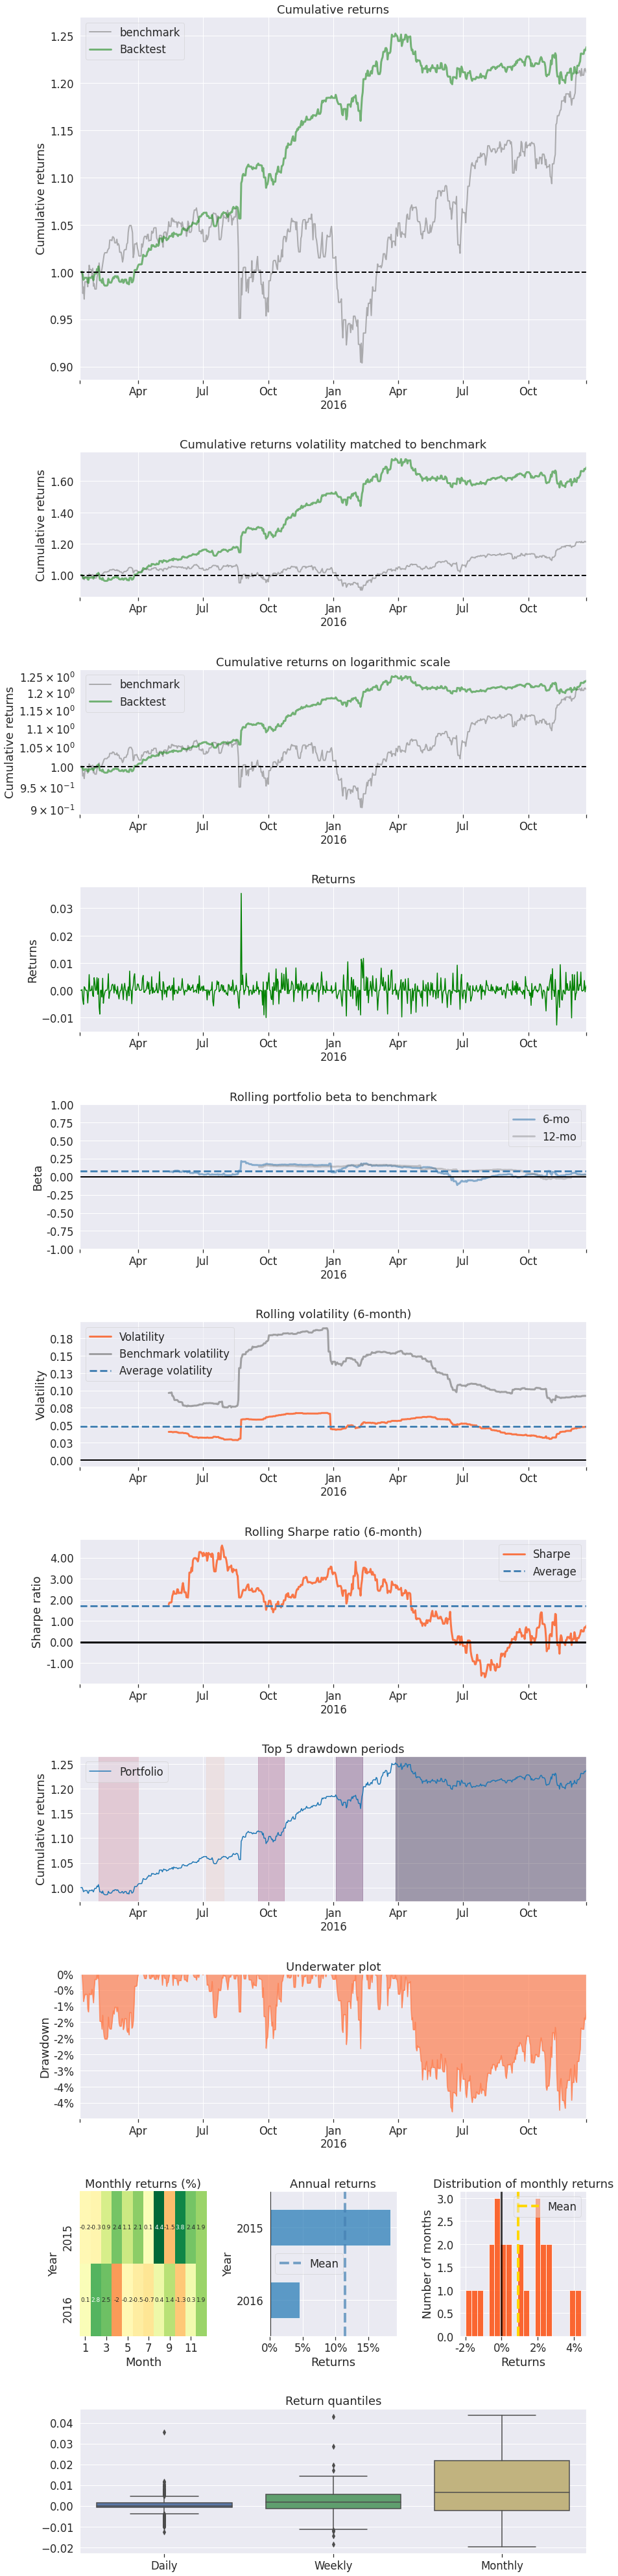

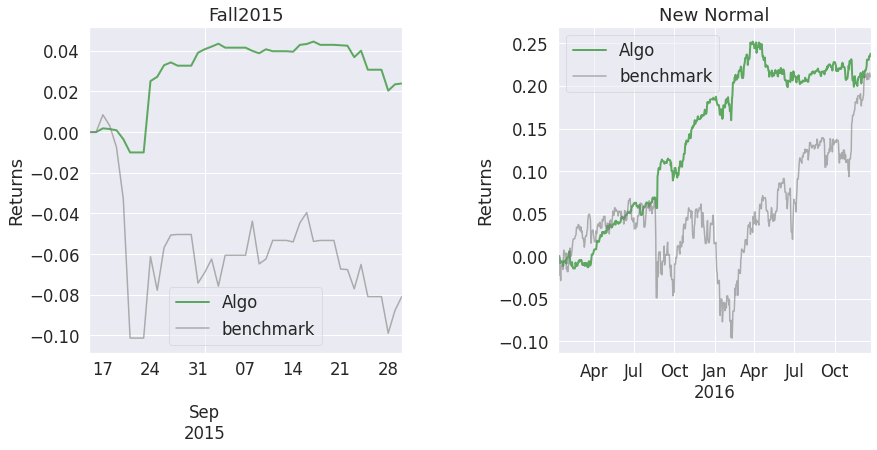

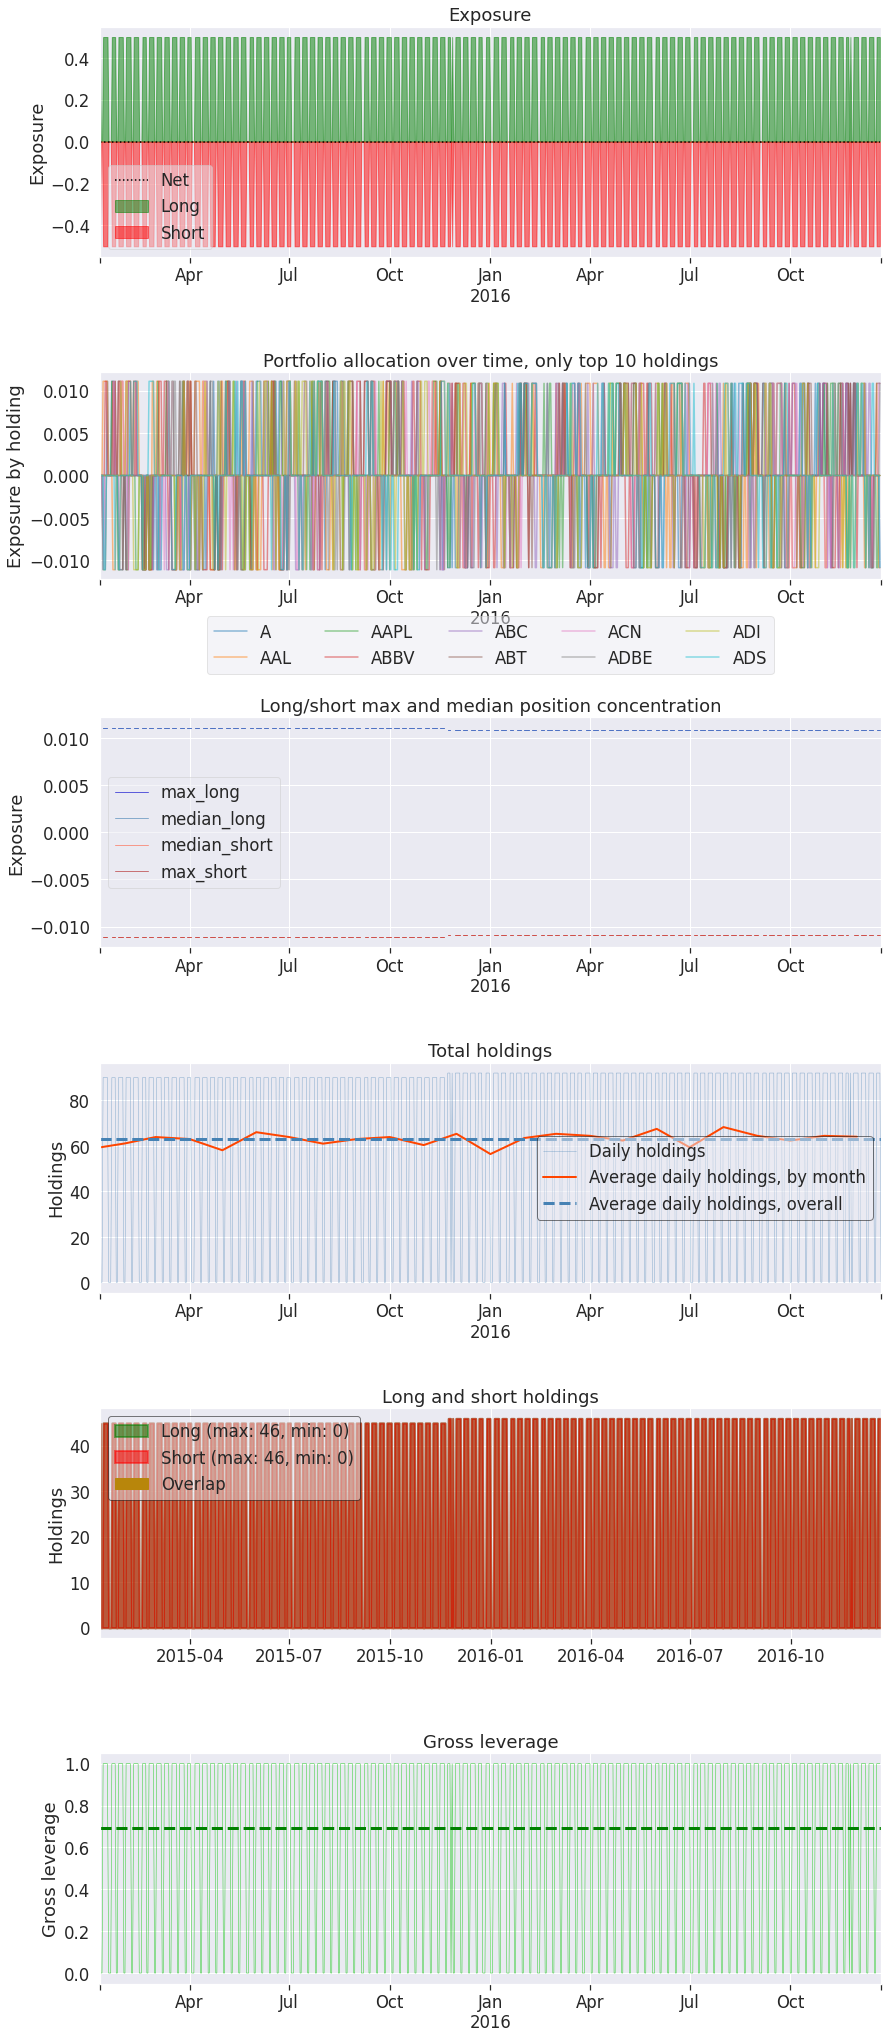

In [13]:
pyfolio.tears.create_full_tear_sheet(pf_returns,
                                     positions=pf_positions,
                                     benchmark_rets=pf_benchmark)

## Subset Performance

### Weekday Analysis

Sometimes it might be useful to analyze subets of your factor data, for example it could be interesting to see the comparison of your factor in different days of the week. Below we'll see how to select and analyze factor data corresponding to Mondays, the positions will be held the for a period of 5 days

In [14]:
monday_factor_data = factor_data[ factor_data.index.get_level_values('date').weekday == 0 ]

In [15]:
pf_returns, pf_positions, pf_benchmark = \
    alphalens.performance.create_pyfolio_input(monday_factor_data,
                                               period='5D',
                                               capital=100000,
                                               long_short=True,
                                               group_neutral=False,
                                               equal_weight=True,
                                               quantiles=[1,5],
                                               groups=None,
                                               benchmark_period='1D')

### Pyfolio Tearsheet

Start date,2015-01-12
End date,2016-12-19
Total months,33
,Backtest
Annual return,2.922%
Cumulative returns,8.427%
Annual volatility,5.117%
Sharpe ratio,0.59
Calmar ratio,0.32
Stability,0.33
Max drawdown,-8.994%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,8.99,2015-12-20,2016-08-29,NaT,NaN
1,2.32,2015-02-08,2015-03-23,2015-04-27,56
2,1.91,2015-06-21,2015-08-17,2015-08-24,46
3,0.58,2015-10-04,2015-10-05,2015-10-12,6
4,0.41,2015-05-17,2015-05-18,2015-06-01,11


Stress Events,mean,min,max
Fall2015,0.10%,-1.09%,4.71%
New Normal,0.01%,-1.98%,4.71%


Top 10 long positions of all time,max
asset,
A,1.11%
AAL,1.11%
ABC,1.11%
ADS,1.11%
AFL,1.11%
AIG,1.11%
ALLE,1.11%
ALXN,1.11%
AMG,1.11%


Top 10 short positions of all time,max
asset,
ABT,-1.11%
ADBE,-1.11%
AES,-1.11%
AET,-1.11%
AKAM,-1.11%
AME,-1.11%
ANSS,-1.11%
ANTM,-1.11%
AOS,-1.11%


Top 10 positions of all time,max
asset,
A,1.11%
AAL,1.11%
ABC,1.11%
ABT,1.11%
ADBE,1.11%
ADS,1.11%
AES,1.11%
AET,1.11%
AFL,1.11%


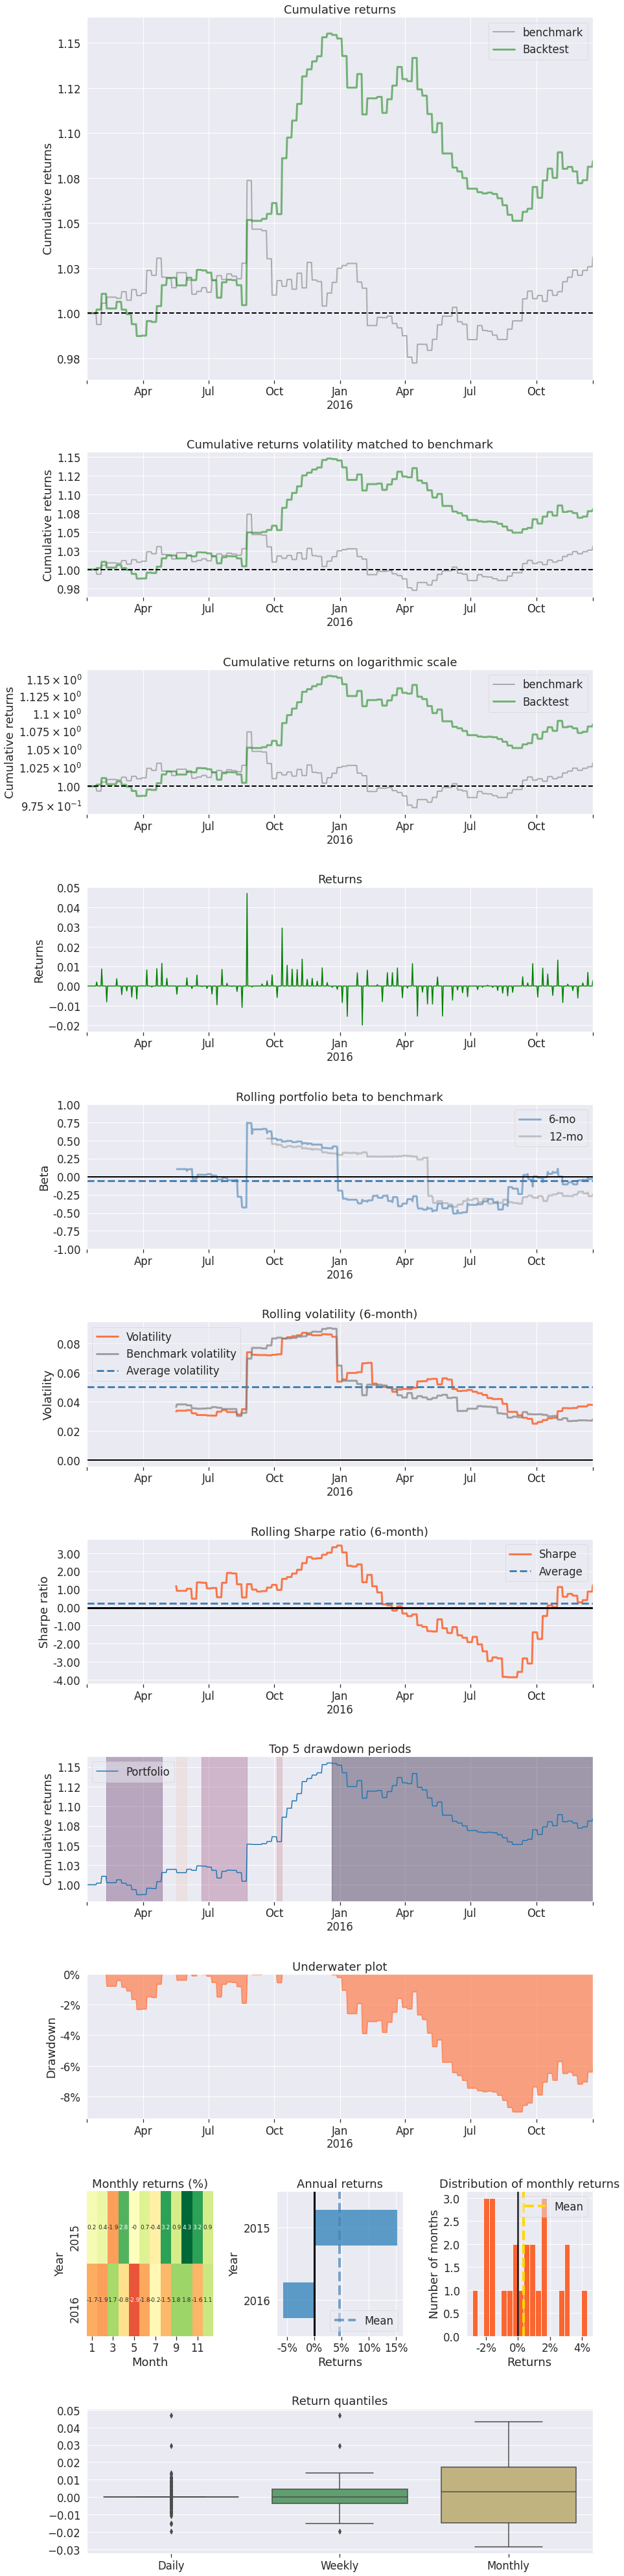

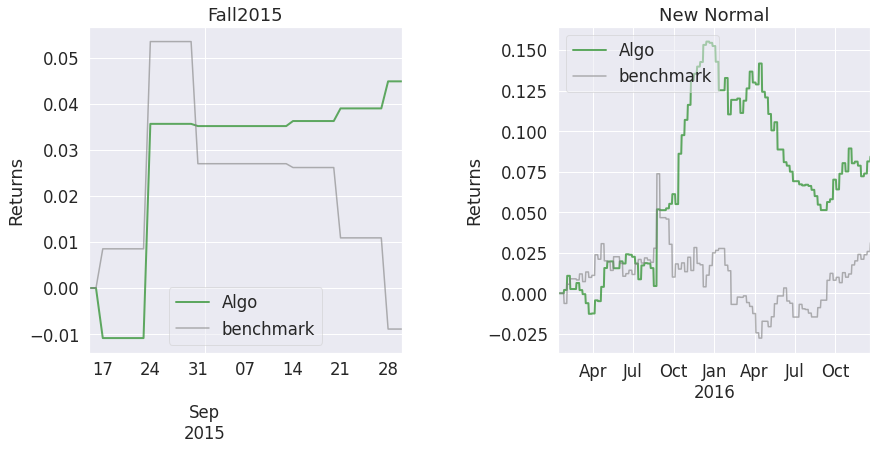

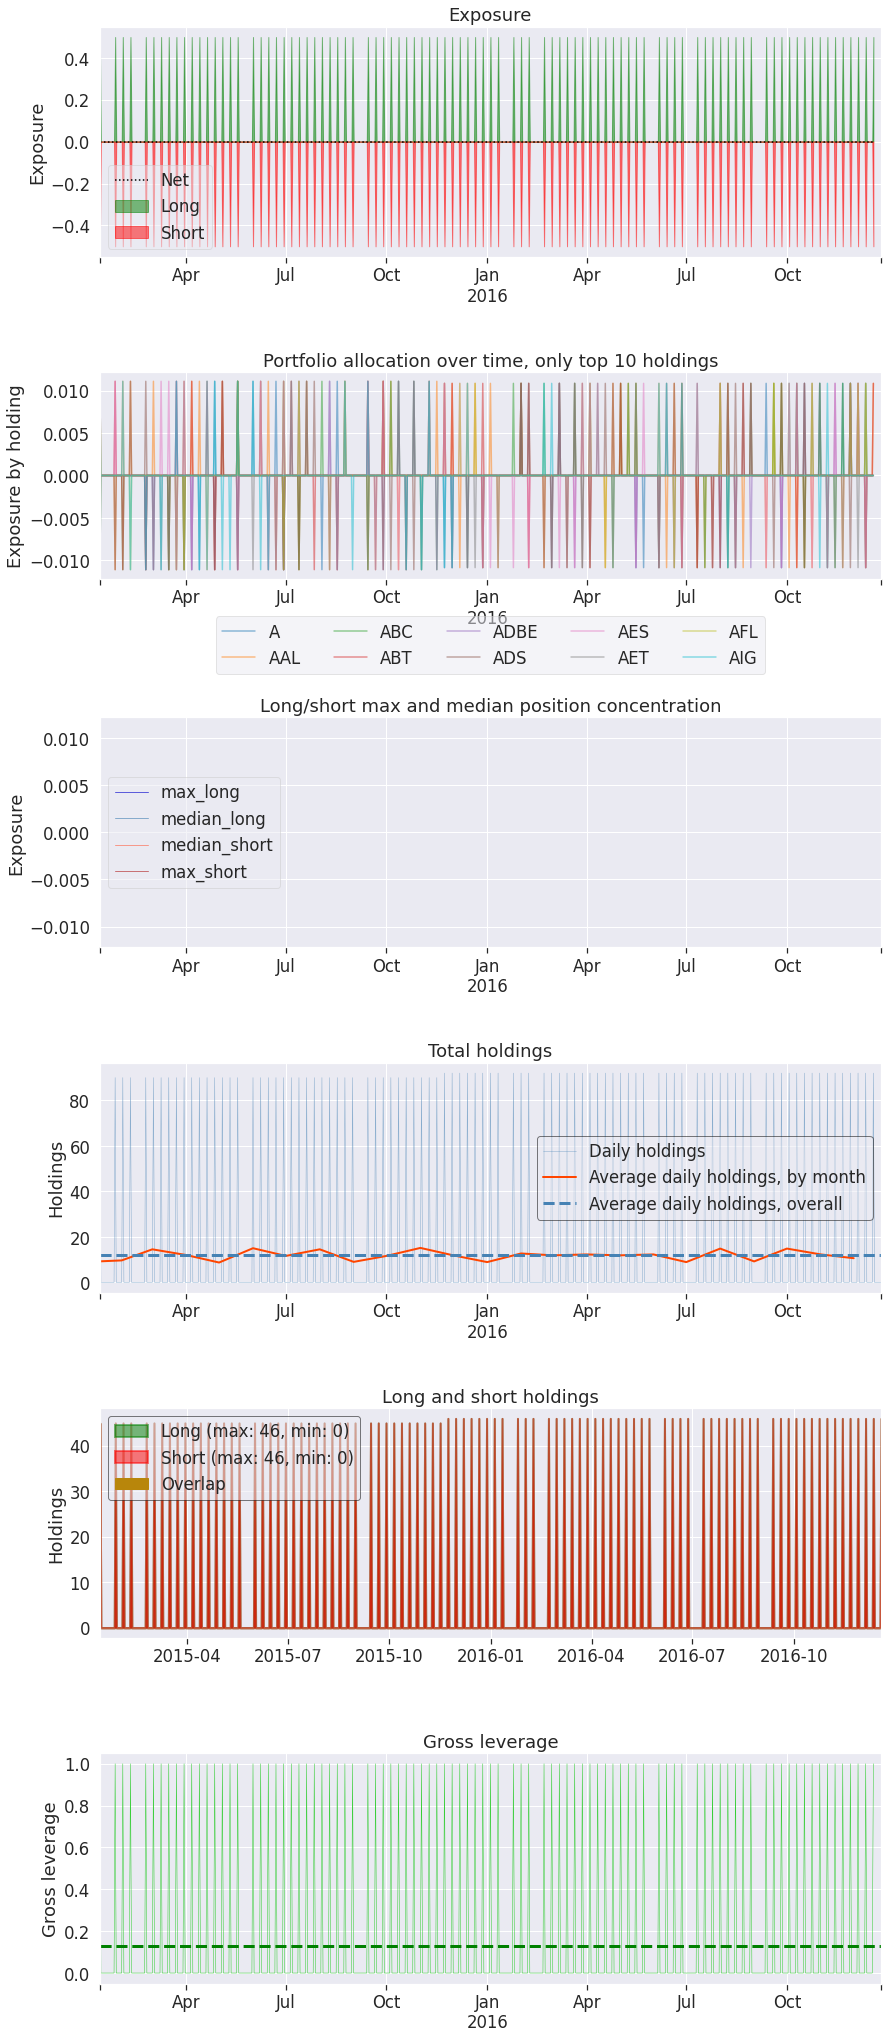

In [16]:
pyfolio.tears.create_full_tear_sheet(pf_returns,
                                     positions=pf_positions,
                                     benchmark_rets=pf_benchmark)